# 房價預測模型

In [36]:
# Data Processing
import polars as pl
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
import joblib

# Visualisation
import matplotlib.pyplot as plt

In [37]:
# load data
dat = pd.read_csv('../data/data_buy.csv')

# Split the data into features (X) and target (y)
x = dat.drop(columns=['neighbor_avg_ping', 'ping'])
y = dat[['ping']]

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

train_hex = x_train['hex_id']
test_hex = x_test['hex_id']

x_train = x_train.drop(['hex_id'], axis=1)
x_test = x_test.drop(['hex_id'], axis=1)

In [38]:
# Train the model
rf = RandomForestRegressor(n_estimators = 1000, max_depth = 10, n_jobs=-1, random_state = 65)

rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print("R^2 of the RF model:", r2)
print("MSE of the RF model:", mse)
print("RMSE of the RF model:", rmse)

c:\Users\ghhab\miniconda3\envs\house-price-prediction\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


R^2 of the RF model: 0.7118934335295724
MSE of the RF model: 153.13249678426718
RMSE of the RF model: 12.374671582885227


In [39]:
param_dist = {'n_estimators': randint(200,1000),
            'max_depth': randint(1,20)}

# Use random search to find the best hyperparameters
search = RandomizedSearchCV(rf, 
                            param_distributions = param_dist, 
                            n_iter = 5, 
                            cv = 5,
                            n_jobs = -1,
                            random_state = 65)

# Fit the random search object to the data
search.fit(x_train, y_train)

rf_bst = search.best_estimator_

y_bst_pred = rf_bst.predict(x_test)

r2_bst = r2_score(y_test, y_bst_pred)
mse_bst = mean_squared_error(y_test, y_bst_pred)
rmse_bst = root_mean_squared_error(y_test, y_bst_pred)

print("The parameters of the best RF:", search.best_params_)
print("R^2 of the RF with weighted district encoding:", r2_bst)
print("MSE of the RF with weighted district encoding:", mse_bst)
print("RMSE of the RF with weighted district encoding:", rmse_bst)

c:\Users\ghhab\miniconda3\envs\house-price-prediction\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


The parameters of the best RF: {'max_depth': 15, 'n_estimators': 317}
R^2 of the RF with weighted district encoding: 0.7515414499089084
MSE of the RF with weighted district encoding: 132.0590453350638
RMSE of the RF with weighted district encoding: 11.491694624165044


In [ ]:
# save the model
joblib.dump(rf_bst, '../model/rf_buy_bst.joblib')

['../model/rf_bst.joblib']

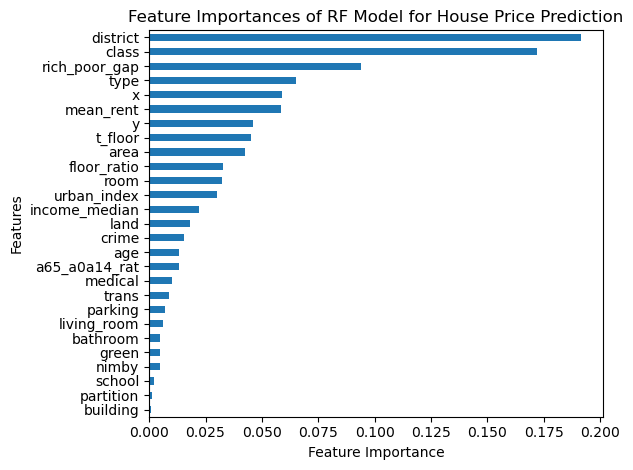

building         0.000809
partition        0.001059
school           0.002300
nimby            0.004647
green            0.004648
bathroom         0.004735
living_room      0.006034
parking          0.007177
trans            0.008929
medical          0.010172
a65_a0a14_rat    0.013055
age              0.013373
crime            0.015346
land             0.018199
income_median    0.021982
urban_index      0.029997
room             0.032111
floor_ratio      0.032545
area             0.042281
t_floor          0.044948
y                0.045911
mean_rent        0.058472
x                0.058932
type             0.065198
rich_poor_gap    0.093780
class            0.171933
district         0.191427
dtype: float64


In [40]:
# Create a series containing feature importances from the model and feature names from the training data
importances = pd.Series(rf_bst.feature_importances_, index=x_train.columns).sort_values(ascending=True)

# Plot a simple bar chart
importances.plot.barh()

plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances of RF Model for House Price Prediction')

# Show the plot
plt.tight_layout()  # Adjust layout to fit everything
plt.show()

print(importances)

In [16]:
# H3 Visualization
pred = pd.Series(y_bst_pred, name = 'pred_ping').reset_index(drop=True)
test = pd.concat([test_hex.astype(str), x_test.astype(float), y_test.astype(float)], axis = 1).reset_index(drop=True)
test_pred = pd.concat([test, pred], axis=1)

test_pred = pl.from_pandas(test_pred).with_columns(
    (pl.col('pred_ping') - pl.col('ping')).alias('diff')
)

# test_pred_weight.head()
test_pred.write_csv('../data/data_buy_diff.csv')

# 房租預測模型

In [17]:
# Data Processing
import polars as pl
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
import joblib

# Visualisation
import matplotlib.pyplot as plt

In [41]:
# load data
dat = pd.read_csv('../data/data_rent.csv')

# Split the data into features (X) and target (y)
x = dat.drop(columns=['mean_rent', 'neighbor_avg_ping', 'ping'])
y = dat[['mean_rent']]

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

train_hex = x_train['hex_id']
test_hex = x_test['hex_id']

x_train = x_train.drop(['hex_id'], axis=1)
x_test = x_test.drop(['hex_id'], axis=1)

In [42]:
# Train the model
rf = RandomForestRegressor(n_estimators = 1000, max_depth = 10, n_jobs=-1, random_state = 65)

rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print("R^2 of the RF model:", r2)
print("MSE of the RF model:", mse)
print("RMSE of the RF model:", rmse)

c:\Users\ghhab\miniconda3\envs\house-price-prediction\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


R^2 of the RF model: 0.9336628516826866
MSE of the RF model: 5746.912101751374
RMSE of the RF model: 75.80839070809625


In [43]:
param_dist = {'n_estimators': randint(200,1000),
            'max_depth': randint(1,20)}

# Use random search to find the best hyperparameters
search = RandomizedSearchCV(rf, 
                            param_distributions = param_dist, 
                            n_iter = 5, 
                            cv = 5,
                            n_jobs = -1,
                            random_state = 65)

# Fit the random search object to the data
search.fit(x_train, y_train)

rf_bst = search.best_estimator_

y_bst_pred = rf_bst.predict(x_test)

r2_bst = r2_score(y_test, y_bst_pred)
mse_bst = mean_squared_error(y_test, y_bst_pred)
rmse_bst = root_mean_squared_error(y_test, y_bst_pred)

print("The parameters of the best RF:", search.best_params_)
print("R^2 of the RF with weighted district encoding:", r2_bst)
print("MSE of the RF with weighted district encoding:", mse_bst)
print("RMSE of the RF with weighted district encoding:", rmse_bst)

c:\Users\ghhab\miniconda3\envs\house-price-prediction\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


The parameters of the best RF: {'max_depth': 15, 'n_estimators': 317}
R^2 of the RF with weighted district encoding: 0.9937998130087058
MSE of the RF with weighted district encoding: 537.1338768279592
RMSE of the RF with weighted district encoding: 23.17614887827482


In [21]:
# save the model
joblib.dump(rf_bst, '../model/rf_rent_bst.joblib')

['../model/rf_rent_bst.joblib']

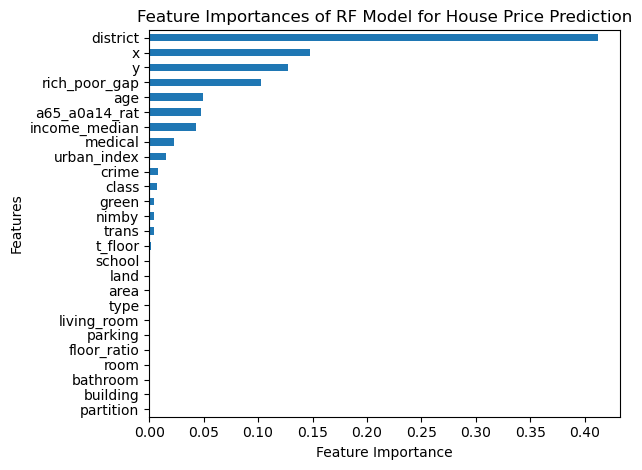

partition        0.000003
building         0.000008
bathroom         0.000019
room             0.000023
floor_ratio      0.000034
parking          0.000035
living_room      0.000040
type             0.000080
area             0.000193
land             0.000216
school           0.000744
t_floor          0.001292
trans            0.004384
nimby            0.004480
green            0.004600
class            0.006932
crime            0.007869
urban_index      0.015536
medical          0.023114
income_median    0.043363
a65_a0a14_rat    0.047942
age              0.049007
rich_poor_gap    0.102663
y                0.127616
x                0.148076
district         0.411731
dtype: float64


In [44]:
# Create a series containing feature importances from the model and feature names from the training data
importances = pd.Series(rf_bst.feature_importances_, index=x_train.columns).sort_values(ascending=True)

# Plot a simple bar chart
importances.plot.barh()

plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances of RF Model for House Price Prediction')

# Show the plot
plt.tight_layout()  # Adjust layout to fit everything
plt.show()

print(importances)

In [23]:
# H3 Visualization
pred = pd.Series(y_bst_pred, name = 'pred_rent').reset_index(drop=True)
test = pd.concat([test_hex.astype(str), x_test.astype(float), y_test.astype(float)], axis = 1).reset_index(drop=True)
test_pred = pd.concat([test, pred], axis=1)

test_pred = pl.from_pandas(test_pred).with_columns(
    (pl.col('pred_rent') - pl.col('mean_rent')).alias('diff')
)

# test_pred_weight.head()
test_pred.write_csv('../data/data_rent_diff.csv')

# Test